# Iniciemos con LangChain

Langchain es un framework "open source" para Ingenieros de IA. Su objetivo es reducir la complejidad en la construccion de software relacionado a proyecto de IA, por ello, provee una herramienta de uso intiitivo para la creacion de servicios de IA.


En este caso, se utilizaran los servicios de OpenIA para acceder a los modelos de lenguaje via API.

In [2]:
# Utilizar en caso que se ejecute el notebook en Colab
!pip install -qU \
  langchain-core==0.3.33 \
  langchain-openai==0.3.3 \
  langchain-community==0.3.16

^C



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\Sebastian\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


# Inicializar OpenAI con gpt-4o-mini

In [1]:
import os
from getpass import getpass

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY") or getpass(
    "Enter OpenAI API Key: "
)

openai_model = "gpt-4o-mini"

In [2]:
from langchain_openai import ChatOpenAI

# For normal accurate responses
llm = ChatOpenAI(temperature=0.0, model=openai_model)

# For unique creative responses
creative_llm = ChatOpenAI(temperature=0.9, model=openai_model)

# Seccion 1: Introduccion y Prompts

Tomaremos un borrador de artículo y utilizaremos LangChain para generar varios elementos útiles en torno a dicho artículo. Crearemos:

Un título para el artículo

Una descripción del artículo

In [9]:
# https://www.mckinsey.com/industries/financial-services/our-insights/the-2023-mckinsey-global-payments-report

article = """

The payments industry’s 2022 performance shows ongoing change with opportunities for growth and margin improvement across geographies and products. A close look at revenues uncovers structural changes, including new developments in instant payments and digital wallets.

This 2023 edition of McKinsey’s Global Payments Report shares key findings from our proprietary market intelligence recorded in the Global Payments Map, which spans more than 25 payments products in 47 countries that together account for 90 percent of global GDP. Among this year’s findings are the following:

Global payments revenue grew by double digits for the second year in a row.
Sustained growth in India, fueled by cash displacement, moved it into the top five countries for payments revenues.
For the first time in several years, interest-based revenue contributed nearly half of revenue growth.
Cash usage declined by nearly four percentage points globally in 2022. Over the past five years, the growth rate for electronic transactions has been nearly triple the overall growth in payments revenue.

Besides noting the industry’s performance in 2022, we take a longer view and see the progress the industry has made since businesses first began creating systems to process their payments. From its early days to the present, the payments sector has already been through three distinct eras. Evidence suggests the industry may be on the verge of a fourth era, which we interpret as an era of “decoupling.” This new era presents concrete opportunities for banks and other payments players.

## Revenue results highlight resilience and future direction

Globally, payments revenues proved remarkably resilient, overcoming a variety of regional headwinds to grow at rates well above the established long-term trend. Payments revenues grew at 11 percent in 2022—a double-digit rate for the second consecutive year—reaching more than $2.2 trillion, an all-time high

## Revenues by geography: Broad-based gains

Revenue growth was broadly distributed geographically, with three of the four regions posting their strongest increases in a decade. North America, Latin America, and Europe, the Middle East, and Africa (EMEA) all grew at double-digit rates.

The exception to this trend is Asia–Pacific. In recent years, this region, which accounts for 47 percent of global payments revenues, has served as the primary growth vector. But in 2022, regional revenues rose just 4 percent, as a result of a 3 percent decline in payment revenues in China. Excluding China, however, the Asia–Pacific region grew at 25 percent—faster than in 2022.

The economies with the largest payments revenue pools delivered growth at or above the mean, contributing to 2022’s strong result. This list, which includes Brazil, India, Japan, and the United States, posted solid results in both interest and fee-driven revenues.

A key insight into China’s results is a 5 percent decline in transactional fee revenue. It fell to $255 billion as a result of smaller ticket sizes on card transactions and fee concessions implemented by payments providers to spur small and medium-size enterprise (SME) activity and counteract the COVID-19 macroeconomic shock.

## By category, interest outpaced fees, and commercial maintained a lead over retail

In many markets, about half of 2022’s revenue growth came from rising interest rates, interrupting a long-standing trend in which fees were the main source of growth. The shifting interest rate environment had the greatest impact on the EMEA region, where net interest margins jumped markedly, reversing a trend of the last decade. EMEA’s transaction-based revenue continued to grow at a steady pace (5 percent in 2022), while net interest income’s (NII) share of total revenues rose from 33 percent to 45 percent in a single year, bringing it closer in line with other regions.

Another way to understand payments revenues is by customer segment (commercial and consumers) and the products that the industry delivers to each (Exhibit 2). The mix has been subtly but persistently tilting toward commercial across all regions for some time. Overall, commercial now accounts for 53 percent of revenues, and consumer 47 percent. This proportion varies from region to region. Commercial revenues have long predominated in Asia–Pacific and EMEA. Consumers still generate the majority in North America (63 percent) and Latin America (54 percent), where markets remain mostly card driven.

Cross-border payment dynamics were particularly robust. Flows reached about $150 trillion in 2022, a 13 percent increase in a single year. This money movement generated an even greater increase in cross-border revenues, which rose 17 percent to $240 billion. Revenues from cross-border consumer payments—both C2B and C2C—increased at double-digit rates, accelerating from high single digits in 2021. Conversely, both forms of commercial payments (B2B and B2C) grew by 10 percent, somewhat slower than 2021’s postpandemic surge.

The US–Latin America corridor remains the largest for C2C remittances, representing 11 percent of the total value of such flows. Central America has been an increasingly relevant destination for remittances and humanitarian aid from the United States.

While B2B remains the primary driver of cross-border revenue (69 percent of the total), the consumer categories carry higher margins and are projected to grow more rapidly over the next five years. Much of the growth is expected to be in C2B, related to increased travel and e-commerce spending.

"""

## Preparando nuestros Prompts

### Descripcion

LangChain incluye varias clases y métodos para organizar o construir nuestros prompts. Trataremos estos en mayor detalle más adelante, pero por ahora cubriremos los aspectos esenciales que necesitamos aquí.

Los prompts para agentes conversacionales se dividen, como mínimo, en tres componentes:

Prompt del sistema: proporciona instrucciones al LLM sobre cómo debe comportarse, cuál es su objetivo, etc.

Prompt del usuario: es la entrada escrita por el usuario.

Prompt de la IA: es la salida generada por la IA. Al representar una conversación, las respuestas anteriores se insertan en el siguiente prompt y se convierten en parte del historial de conversación.

Eres un asistente de IA, realizarás XYZ.       | PROMPT DEL SISTEMA

Usuario: Hola, ¿cuál es la capital de Australia?    | PROMPT DEL USUARIO  
IA: Es Canberra                                     | PROMPT DE LA IA  
Usuario: ¿Cuál es la mejor época para visitar?     | PROMPT DEL USUARIO  

LangChain nos proporciona plantillas para cada uno de estos tipos de prompt. Al utilizar plantillas, podemos insertar diferentes entradas y modificar el prompt según los insumos proporcionados.

Inicialicemos primero nuestro prompt del sistema y del usuario:

### Nivel 1 Prompts

In [10]:
from langchain.prompts import SystemMessagePromptTemplate, HumanMessagePromptTemplate

# Defining the system prompt (how the AI should act)
system_prompt = SystemMessagePromptTemplate.from_template(
    "You are an AI assistant that helps generate article titles."
)

# the user prompt is provided by the user, in this case however the only dynamic
# input is the article
user_prompt = HumanMessagePromptTemplate.from_template(
    """You are tasked with creating a name for a article.
The article is here for you to examine {article}

The name should be based of the context of the article.
Be creative, but make sure the names are clear, catchy,
and relevant to the theme of the article.

Only output the article name, no other explanation or
text can be provided.""",
    input_variables=["article"]
)

In [12]:
# Indicate "TEST STRING" as article
user_prompt.format(article="TEST STRING")

HumanMessage(content='You are tasked with creating a name for a article.\nThe article is here for you to examine TEST STRING\n\nThe name should be based of the context of the article.\nBe creative, but make sure the names are clear, catchy,\nand relevant to the theme of the article.\n\nOnly output the article name, no other explanation or\ntext can be provided.', additional_kwargs={}, response_metadata={})

#### Primer Prompt: Obtener título del articulo

##### ChatPromptTemplate

In [ ]:
from langchain.prompts import ChatPromptTemplate

# Concatenate components prompt
first_prompt = ChatPromptTemplate.from_messages([system_prompt, user_prompt])

In [ ]:
# Show complete prompt with "TEST STRING"
print(first_prompt.format(article="TEST STRING"))

System: You are an AI assistant that helps generate article titles.
Human: You are tasked with creating a name for a article.
The article is here for you to examine TEST STRING

The name should be based of the context of the article.
Be creative, but make sure the names are clear, catchy,
and relevant to the theme of the article.

Only output the article name, no other explanation or
text can be provided.


##### **L**ang**C**hain **E**xpression **L**anguage (LCEL)

In [16]:
chain_one = (
    {"article": lambda x: x["article"]}
    | first_prompt
    | creative_llm
    | {"article_title": lambda x: x.content}
)

In [17]:
article_title_msg = chain_one.invoke({"article": article})
article_title_msg

{'article_title': '"Navigating the Future of Payments: Insights from McKinsey\'s 2023 Global Payments Report"'}

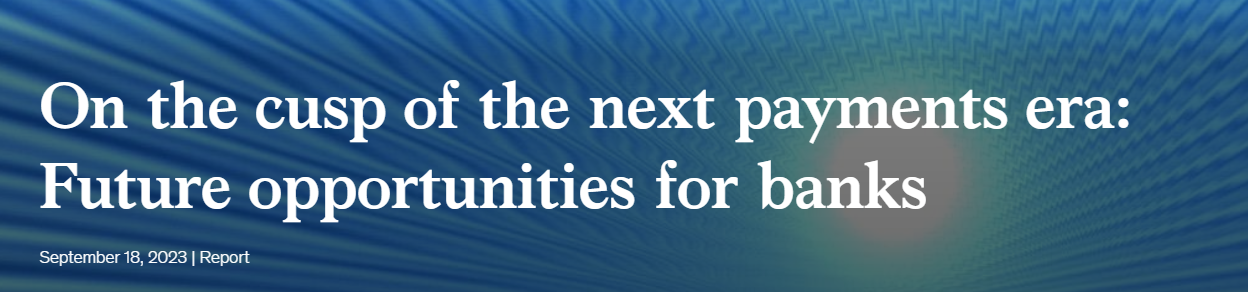

#### Segundo Prompt: Obtener Resumen del articulo

In [ ]:
second_user_prompt = HumanMessagePromptTemplate.from_template(
    """You are tasked with creating a description for
the article. The article is here for you to examine:

---

{article}

---

Here is the article title '{article_title}'.

Output the SEO friendly article description. Do not output
anything other than the description.""",
    input_variables=["article", "article_title"]
)

second_prompt = ChatPromptTemplate.from_messages([
    system_prompt,
    second_user_prompt
])

print(second_prompt)



input_variables=['article', 'article_title'] input_types={} partial_variables={} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are an AI assistant that helps generate article titles.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['article', 'article_title'], input_types={}, partial_variables={}, template="You are tasked with creating a description for\nthe article. The article is here for you to examine:\n\n---\n\n{article}\n\n---\n\nHere is the article title '{article_title}'.\n\nOutput the SEO friendly article description. Do not output\nanything other than the description."), additional_kwargs={})]


In [19]:
chain_two = (
    {
        "article": lambda x: x["article"],
        "article_title": lambda x: x["article_title"]
    }
    | second_prompt
    | llm
    | {"summary": lambda x: x.content}
)

In [ ]:
article_description_msg = chain_two.invoke({
    "article": article,
    "article_title": article_title_msg["article_title"]
})

article_description_msg

{'summary': 'Explore the key findings from McKinsey\'s 2023 Global Payments Report, which highlights the payments industry\'s remarkable growth and resilience in 2022. Discover how global payments revenue surged to over $2.2 trillion, driven by innovations in instant payments and digital wallets. This article delves into geographical revenue trends, the impact of rising interest rates, and the shift towards commercial payments. Learn about the evolving landscape of cross-border transactions and the significant role of emerging markets like India. Gain insights into the industry\'s potential fourth era of "decoupling" and the opportunities it presents for banks and payment providers.'}

#### Tercer Prompt: Solicitar recomendacion para mejorar redaccion

In [21]:
third_user_prompt = HumanMessagePromptTemplate.from_template(
    """You are tasked with creating a new paragraph for the
article. The article is here for you to examine:

---

{article}

---

Choose one paragraph to review and edit. During your edit
ensure you provide constructive feedback to the user so they
can learn where to improve their own writing.""",
    input_variables=["article"]
)

# prompt template 3: creating a new paragraph for the article
third_prompt = ChatPromptTemplate.from_messages([
    system_prompt,
    third_user_prompt
])

Creamos un objeto Pydantic que describe el formato de salida que necesitamos. Esta descripción del formato se pasa luego a nuestro modelo utilizando el métodoe `with_structured_output`:

In [22]:
from pydantic import BaseModel, Field

class Paragraph(BaseModel):
    original_paragraph: str = Field(description="The original paragraph")
    edited_paragraph: str = Field(description="The improved edited paragraph")
    feedback: str = Field(description=(
        "Constructive feedback on the original paragraph"
    ))

structured_llm = creative_llm.with_structured_output(Paragraph)

In [23]:
# chain 3: inputs: article / output: article_para
chain_three = (
    {"article": lambda x: x["article"]}
    | third_prompt
    | structured_llm
    | {
        "original_paragraph": lambda x: x.original_paragraph,
        "edited_paragraph": lambda x: x.edited_paragraph,
        "feedback": lambda x: x.feedback
    }
)

In [24]:
out = chain_three.invoke({"article": article})
out

{'original_paragraph': 'The US–Latin America corridor remains the largest for C2C remittances, representing 11 percent of the total value of such flows. Central America has been an increasingly relevant destination for remittances and humanitarian aid from the United States.',
 'edited_paragraph': "The US–Latin America corridor continues to dominate the C2C remittance landscape, accounting for 11 percent of the total value of these transactions. Additionally, Central America has emerged as a significant recipient of remittances and humanitarian aid from the United States, highlighting the region's growing importance in financial flows.",
 'feedback': 'The original paragraph contains relevant information but could benefit from a more dynamic opening. Consider using stronger verbs and varying sentence structure to improve readability and engagement. For example, instead of starting with \'remains the largest,\' consider \'continues to dominate.\' This makes the statement more assertive. 

### Nivel 2 Prompts

In [ ]:
# Ejecutar si se utiliza Colab
!pip install -qU \
  langchain-core==0.3.33 \
  langchain-openai==0.3.3 \
  langchain-community==0.3.16 \
  langsmith==0.3.4

In [25]:
from langchain.prompts import ChatPromptTemplate

prompt = """
Answer the user's query based on the context below.
If you cannot answer the question using the
provided information answer with "I don't know".

Context: {context}
"""

# passing the template to the LangChain model
prompt_template = ChatPromptTemplate.from_messages([
    ("system", prompt),
    ("user", "{query}"),
])

In [26]:
from langchain.prompts import ChatPromptTemplate

# passing the template to the LangChain model
prompt_template = ChatPromptTemplate.from_messages([
    ("system", prompt),
    ("user", "{query}"),
])

Cuando llamamos a la template, se espera que proporcionemos dos variables: context y query. Ambas variables se extraen de las cadenas que escribimos, ya que LangChain interpreta la sintaxis con llaves (es decir, {context} y {query}) como una variable dinámica que se insertará en el momento de la consulta. Podemos ver que estas variables han sido reconocidas por nuestro objeto template al observar su atributo input_variables:

In [27]:
prompt_template.input_variables

['context', 'query']

También podemos visualizar la estructura de los mensajes (actualmente prompt templates) que construirá el ChatPromptTemplate al observar el atributo messages:

In [29]:
prompt_template.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, template='\nAnswer the user\'s query based on the context below.\nIf you cannot answer the question using the\nprovided information answer with "I don\'t know".\n\nContext: {context}\n'), additional_kwargs={}),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['query'], input_types={}, partial_variables={}, template='{query}'), additional_kwargs={})]

A partir de esto, podemos observar que cada tupla proporcionada al utilizar ChatPromptTemplate.from_messages se convierte en una plantilla de prompt individual. Dentro de cada una de estas tuplas, el primer valor define el rol del mensaje, que suele ser system, human o ai. Utilizar estas tuplas es una forma abreviada de escribir el siguiente código, más explícito:

In [30]:
from langchain.prompts import (
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate
)

prompt_template = ChatPromptTemplate.from_messages([
    SystemMessagePromptTemplate.from_template(prompt),
    HumanMessagePromptTemplate.from_template("{query}"),
])

In [32]:
# La estructura es identica a la anterior
prompt_template.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, template='\nAnswer the user\'s query based on the context below.\nIf you cannot answer the question using the\nprovided information answer with "I don\'t know".\n\nContext: {context}\n'), additional_kwargs={}),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['query'], input_types={}, partial_variables={}, template='{query}'), additional_kwargs={})]

#### Llamando nuestros LLM con estructuras definidas

In [ ]:
import os
from getpass import getpass

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY") or getpass(
    "Enter OpenAI API Key: "
)

openai_model = "gpt-4o-mini"

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(temperature=0.0, model=openai_model)

In [33]:
pipeline = (
    {
        "query": lambda x: x["query"],
        "context": lambda x: x["context"]
    }
    | prompt_template
    | llm
)

In [34]:
context = """The 2023 McKinsey Global Payments Report offers a comprehensive analysis of the evolving global payments landscape, highlighting significant shifts and emerging opportunities for financial institutions. Drawing on data from over 25 payment products across 47 countries—representing 90% of global GDP—the report underscores the industry's resilience and adaptability in the face of changing economic conditions.
Key findings from the report include:
Robust Revenue Growth: Global payments revenue experienced double-digit growth for the second consecutive year, reaching an all-time high of over $2.2 trillion in 2022. 
Regional Dynamics: India's sustained growth, driven by a shift from cash to digital payments, propelled it into the top five countries for payments revenue. Conversely, China's payment revenues declined by 3%, attributed to reduced transaction sizes and fee concessions aimed at supporting SMEs. 
Shift in Revenue Composition: For the first time in several years, interest-based income contributed nearly half of the revenue growth, indicating a significant shift in the industry's revenue streams. 
Decline in Cash Usage: Global cash usage decreased by nearly four percentage points in 2022, with electronic transactions growing at nearly triple the rate of overall payments revenue over the past five years. 
The report also introduces the concept of a forthcoming "decoupled era" in payments, characterized by the separation of payment transactions from traditional banking accounts. This evolution presents both challenges and opportunities for banks and payment providers to innovate and adapt to the changing ecosystem
"""

query = "whar are most relevant insights McKinsey Global Payments Report related to payments trends ?"

In [41]:
pipeline.invoke({"query": query, "context": context})


AIMessage(content='The most relevant insights from the 2023 McKinsey Global Payments Report related to payments trends include:\n\n1. **Robust Revenue Growth**: Global payments revenue reached an all-time high of over $2.2 trillion in 2022, experiencing double-digit growth for the second consecutive year.\n\n2. **Regional Dynamics**: India has seen significant growth due to a shift from cash to digital payments, placing it among the top five countries for payments revenue. In contrast, China\'s payment revenues declined by 3% due to reduced transaction sizes and fee concessions for SMEs.\n\n3. **Shift in Revenue Composition**: Interest-based income has contributed nearly half of the revenue growth for the first time in several years, indicating a shift in the industry\'s revenue streams.\n\n4. **Decline in Cash Usage**: Global cash usage decreased by nearly four percentage points in 2022, while electronic transactions grew at nearly triple the rate of overall payments revenue over the 

Nuestro pipeline de LLM es capaz de consumir la información del context y utilizarla para responder a la query del usuario. Por supuesto, normalmente no estaríamos introduciendo manualmente tanto la pregunta como la respuesta en un LLM. Típicamente, el context se recuperaría desde una base de datos vectorial, mediante una búsqueda web o desde otra fuente. Trataremos este caso de uso en detalle y construiremos una pipeline RAG funcional en un capítulo futuro.

#### Tipos de Prompt

##### 1. Few Shoting Prompt

In [44]:
example_prompt = ChatPromptTemplate.from_messages([
    ("human", "{input}"),
    ("ai", "{output}"),
])

examples = [
    {"input": "Here is query #1", "output": "Here is the answer #1"},
    {"input": "Here is query #2", "output": "Here is the answer #2"},
    {"input": "Here is query #3", "output": "Here is the answer #3"},
]

from langchain.prompts import FewShotChatMessagePromptTemplate

few_shot_prompt = FewShotChatMessagePromptTemplate(
    example_prompt=example_prompt,
    examples=examples,
)
# here is the formatted prompt
print(few_shot_prompt.format())

Human: Here is query #1
AI: Here is the answer #1
Human: Here is query #2
AI: Here is the answer #2
Human: Here is query #3
AI: Here is the answer #3


In [45]:
new_system_prompt = """
Answer the user's query based on the context below.
If you cannot answer the question using the
provided information answer with "I don't know".

Always answer in markdown format. When doing so please
provide headers, short summaries, follow with bullet
points, then conclude.

Context: {context}
"""

prompt_template.messages[0].prompt.template = new_system_prompt

out = pipeline.invoke({"query": query, "context": context}).content
print(out)

# Key Insights from the McKinsey Global Payments Report

The 2023 McKinsey Global Payments Report provides valuable insights into the current trends in the global payments landscape. Here are the most relevant findings:

## Robust Revenue Growth
- Global payments revenue reached an all-time high of over $2.2 trillion in 2022.
- This marks double-digit growth for the second consecutive year.

## Regional Dynamics
- **India**: Experienced significant growth due to a shift from cash to digital payments, placing it among the top five countries for payments revenue.
- **China**: Saw a decline in payment revenues by 3%, influenced by reduced transaction sizes and fee concessions for SMEs.

## Shift in Revenue Composition
- Interest-based income contributed nearly half of the revenue growth for the first time in several years, indicating a shift in revenue streams within the industry.

## Decline in Cash Usage
- Global cash usage decreased by nearly four percentage points in 2022.
- Electroni

In [46]:
from IPython.display import display, Markdown

display(Markdown(out))

# Key Insights from the McKinsey Global Payments Report

The 2023 McKinsey Global Payments Report provides valuable insights into the current trends in the global payments landscape. Here are the most relevant findings:

## Robust Revenue Growth
- Global payments revenue reached an all-time high of over $2.2 trillion in 2022.
- This marks double-digit growth for the second consecutive year.

## Regional Dynamics
- **India**: Experienced significant growth due to a shift from cash to digital payments, placing it among the top five countries for payments revenue.
- **China**: Saw a decline in payment revenues by 3%, influenced by reduced transaction sizes and fee concessions for SMEs.

## Shift in Revenue Composition
- Interest-based income contributed nearly half of the revenue growth for the first time in several years, indicating a shift in revenue streams within the industry.

## Decline in Cash Usage
- Global cash usage decreased by nearly four percentage points in 2022.
- Electronic transactions have been growing at nearly triple the rate of overall payments revenue over the past five years.

## Emergence of a Decoupled Era
- The report introduces the concept of a "decoupled era" in payments, where payment transactions are separated from traditional banking accounts.
- This evolution presents both challenges and opportunities for banks and payment providers to innovate.

## Conclusion
The McKinsey Global Payments Report highlights significant trends such as robust revenue growth, regional dynamics, a shift in revenue composition, declining cash usage, and the emergence of a decoupled payments era. These insights are crucial for financial institutions to navigate the evolving payments landscape effectively.

###### Example

In [47]:
examples = [
    {
        "input": "Can you explain gravity?",
        "output": (
            "## Gravity\n\n"
            "Gravity is one of the fundamental forces in the universe.\n\n"
            "### Discovery\n\n"
            "* Gravity was first discovered by Sir Isaac Newton in the late 17th century.\n"
            "* It was said that Newton theorized about gravity after seeing an apple fall from a tree.\n\n"
            "### In General Relativity\n\n"
            "* Gravity is described as the curvature of spacetime.\n"
            "* The more massive an object is, the more it curves spacetime.\n"
            "* This curvature is what causes objects to fall towards each other.\n\n"
            "### Gravitons\n\n"
            "* Gravitons are hypothetical particles that mediate the force of gravity.\n"
            "* They have not yet been detected.\n\n"
            "**To conclude**, Gravity is a fascinating topic and has been studied extensively since the time of Newton.\n\n"
        )
    },
    {
        "input": "What is the capital of France?",
        "output": (
            "## France\n\n"
            "The capital of France is Paris.\n\n"
            "### Origins\n\n"
            "* The name Paris comes from the Latin word \"Parisini\" which referred to a Celtic people living in the area.\n"
            "* The Romans named the city Lutetia, which means \"the place where the river turns\".\n"
            "* The city was renamed Paris in the 3rd century BC by the Celtic-speaking Parisii tribe.\n\n"
            "**To conclude**, Paris is highly regarded as one of the most beautiful cities in the world and is one of the world's greatest cultural and economic centres.\n\n"
        )
    }
]

In [48]:
few_shot_prompt = FewShotChatMessagePromptTemplate(
    example_prompt=example_prompt,
    examples=examples,
)

out = few_shot_prompt.format()

display(Markdown(out))

Human: Can you explain gravity?
AI: ## Gravity

Gravity is one of the fundamental forces in the universe.

### Discovery

* Gravity was first discovered by Sir Isaac Newton in the late 17th century.
* It was said that Newton theorized about gravity after seeing an apple fall from a tree.

### In General Relativity

* Gravity is described as the curvature of spacetime.
* The more massive an object is, the more it curves spacetime.
* This curvature is what causes objects to fall towards each other.

### Gravitons

* Gravitons are hypothetical particles that mediate the force of gravity.
* They have not yet been detected.

**To conclude**, Gravity is a fascinating topic and has been studied extensively since the time of Newton.


Human: What is the capital of France?
AI: ## France

The capital of France is Paris.

### Origins

* The name Paris comes from the Latin word "Parisini" which referred to a Celtic people living in the area.
* The Romans named the city Lutetia, which means "the place where the river turns".
* The city was renamed Paris in the 3rd century BC by the Celtic-speaking Parisii tribe.

**To conclude**, Paris is highly regarded as one of the most beautiful cities in the world and is one of the world's greatest cultural and economic centres.



In [49]:
few_shot_prompt

FewShotChatMessagePromptTemplate(examples=[{'input': 'Can you explain gravity?', 'output': '## Gravity\n\nGravity is one of the fundamental forces in the universe.\n\n### Discovery\n\n* Gravity was first discovered by Sir Isaac Newton in the late 17th century.\n* It was said that Newton theorized about gravity after seeing an apple fall from a tree.\n\n### In General Relativity\n\n* Gravity is described as the curvature of spacetime.\n* The more massive an object is, the more it curves spacetime.\n* This curvature is what causes objects to fall towards each other.\n\n### Gravitons\n\n* Gravitons are hypothetical particles that mediate the force of gravity.\n* They have not yet been detected.\n\n**To conclude**, Gravity is a fascinating topic and has been studied extensively since the time of Newton.\n\n'}, {'input': 'What is the capital of France?', 'output': '## France\n\nThe capital of France is Paris.\n\n### Origins\n\n* The name Paris comes from the Latin word "Parisini" which refe

In [50]:
prompt_template = ChatPromptTemplate.from_messages([
    ("system", new_system_prompt),
    few_shot_prompt,
    ("user", "{query}"),
])

In [51]:
pipeline = prompt_template | llm
out = pipeline.invoke({"query": query, "context": context}).content
display(Markdown(out))

## Key Insights from the McKinsey Global Payments Report

The 2023 McKinsey Global Payments Report provides valuable insights into current trends in the payments landscape.

### Relevant Insights

- **Robust Revenue Growth**: 
  - Global payments revenue reached an all-time high of over $2.2 trillion in 2022, marking double-digit growth for the second consecutive year.

- **Regional Dynamics**: 
  - India has emerged as a leader in payments revenue, driven by a significant shift from cash to digital payments.
  - In contrast, China's payment revenues declined by 3%, influenced by reduced transaction sizes and fee concessions for SMEs.

- **Shift in Revenue Composition**: 
  - For the first time in several years, nearly half of the revenue growth came from interest-based income, indicating a shift in the industry's revenue streams.

- **Decline in Cash Usage**: 
  - Global cash usage decreased by nearly four percentage points in 2022, while electronic transactions grew at nearly triple the rate of overall payments revenue over the past five years.

- **Decoupled Era in Payments**: 
  - The report introduces the concept of a "decoupled era," where payment transactions are separated from traditional banking accounts, presenting both challenges and opportunities for banks and payment providers.

**To conclude**, these insights highlight the evolving nature of the payments industry, emphasizing growth in digital transactions and the need for adaptation among financial institutions.

Podemos ver que al agregar algunos ejemplos a nuestro prompt, es decir, mediante few-shot prompting, podemos obtener un control mucho mayor sobre la estructura exacta de la respuesta de nuestro LLM. A medida que aumenta el tamaño de los LLMs, su capacidad para seguir instrucciones mejora considerablemente y tienden a requerir menos prompting explícito, como lo hemos mostrado aquí. Sin embargo, incluso para modelos de última generación como gpt-4o, el few-shot prompting sigue siendo una técnica válida que puede utilizarse si el LLM tiene dificultades para seguir nuestras instrucciones previstas.

##### 2. Chain of Thought Prompting

Vamos a analizar una técnica de prompting comúnmente utilizada llamada chain of thought (CoT). CoT es una técnica que incentiva al LLM a razonar sobre el problema paso a paso antes de proporcionar una respuesta. La idea es que, al descomponer el problema en pasos más pequeños, el LLM tiene más probabilidades de llegar a la respuesta correcta y es menos probable que genere alucinaciones.

Para implementar CoT no necesitamos objetos específicos de LangChain; en cambio, simplemente modificamos la forma en que damos instrucciones a nuestro LLM dentro del system prompt. Le pediremos al LLM que enumere los problemas que deben resolverse, que resuelva cada problema de forma individual y, finalmente, que llegue a una respuesta final.

In [52]:
no_cot_system_prompt = """
Be a helpful assistant and answer the user's question.

You MUST answer the question directly without any other
text or explanation.
"""

no_cot_prompt_template = ChatPromptTemplate.from_messages([
    ("system", no_cot_system_prompt),
    ("user", "{query}"),
])

In [53]:
query = (
    "How many keystrokes are needed to type the numbers from 1 to 500?"
)

no_cot_pipeline = no_cot_prompt_template | llm
no_cot_result = no_cot_pipeline.invoke({"query": query}).content
print(no_cot_result)

The total number of keystrokes needed to type the numbers from 1 to 500 is 1,500.


La respuesta correcta es 1392, pero el LLM, sin CoT, simplemente genera una suposición. Ahora, podemos agregar un CoT prompting explícito a nuestro system prompt para ver si obtenemos un mejor resultado.

Para implementar el chain of thought (CoT), modificamos el prompt de la siguiente manera:

In [54]:
# Define the chain-of-thought prompt template
cot_system_prompt = """
Be a helpful assistant and answer the user's question.

To answer the question, you must:

- List systematically and in precise detail all
  subproblems that need to be solved to answer the
  question.
- Solve each sub problem INDIVIDUALLY and in sequence.
- Finally, use everything you have worked through to
  provide the final answer.
"""

cot_prompt_template = ChatPromptTemplate.from_messages([
    ("system", cot_system_prompt),
    ("user", "{query}"),
])

cot_pipeline = cot_prompt_template | llm

In [55]:
cot_result = cot_pipeline.invoke({"query": query}).content
display(Markdown(cot_result))

To determine how many keystrokes are needed to type the numbers from 1 to 500, we can break this problem down into several subproblems:

### Subproblems:
1. Count the number of digits in the numbers from 1 to 9.
2. Count the number of digits in the numbers from 10 to 99.
3. Count the number of digits in the numbers from 100 to 499.
4. Count the digits in the number 500.
5. Sum all the digits counted in the previous steps to get the total number of keystrokes.

### Step 1: Count the number of digits in the numbers from 1 to 9
- The numbers from 1 to 9 are single-digit numbers.
- There are 9 numbers (1, 2, 3, 4, 5, 6, 7, 8, 9).
- Each number contributes 1 keystroke.

**Total keystrokes for 1 to 9 = 9 numbers × 1 digit = 9 keystrokes.**

### Step 2: Count the number of digits in the numbers from 10 to 99
- The numbers from 10 to 99 are two-digit numbers.
- There are 90 numbers (10, 11, 12, ..., 99).
- Each number contributes 2 keystrokes.

**Total keystrokes for 10 to 99 = 90 numbers × 2 digits = 180 keystrokes.**

### Step 3: Count the number of digits in the numbers from 100 to 499
- The numbers from 100 to 499 are three-digit numbers.
- There are 400 numbers (100, 101, 102, ..., 499).
- Each number contributes 3 keystrokes.

**Total keystrokes for 100 to 499 = 400 numbers × 3 digits = 1200 keystrokes.**

### Step 4: Count the digits in the number 500
- The number 500 is a three-digit number.
- It contributes 3 keystrokes.

**Total keystrokes for 500 = 3 keystrokes.**

### Step 5: Sum all the digits counted in the previous steps
Now we will sum the total keystrokes from each range:
- From 1 to 9: 9 keystrokes
- From 10 to 99: 180 keystrokes
- From 100 to 499: 1200 keystrokes
- For 500: 3 keystrokes

**Total keystrokes = 9 + 180 + 1200 + 3 = 1392 keystrokes.**

### Final Answer:
The total number of keystrokes needed to type the numbers from 1 to 500 is **1392 keystrokes**.

##### 3. Particionar tareas complejas -> Unir Prompts complejos (Actividad)

##### 4. Seguimiento sistemático y evaluacion de los prompts -> Mejorar el rendimiento de los prompts (Atividad)

# Seccion 2: Memoria

In [ ]:
# Ejecutar en caso de utilizar Colab
!pip install -qU \
  langchain-core==0.3.33 \
  langchain-openai==0.3.3 \
  langchain-community==0.3.16 \
  langsmith==0.3.4

In [ ]:
import os
from getpass import getpass
from langchain_openai import ChatOpenAI

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY") or \
    getpass("Enter your OpenAI API key: ")

# For normal accurate responses
llm = ChatOpenAI(temperature=0.0, model="gpt-4o-mini")

### 1. Conversation Buffer Memory

In [56]:
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory(return_messages=True)

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_17832\1448044083.py:3: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(return_messages=True)


In [57]:
memory.save_context(
    {"input": "Hi, my name is James"},  # user message
    {"output": "Hello James, how can I assist you with your financial claim today?"}  # AI response
)
memory.save_context(
    {"input": "I'm trying to file a claim regarding an unauthorized transaction."},  # user message
    {"output": "I understand. Could you provide the date and amount of the transaction?"}  # AI response
)
memory.save_context(
    {"input": "Yes, it happened on May 2nd, and the amount was $275."},  # user message
    {"output": "Got it. Was this transaction made with your debit or credit card?"}  # AI response
)
memory.save_context(
    {"input": "It was with my credit card, and I didn’t authorize it."},  # user message
    {"output": "Understood. Have you already reported this to your bank?"}  # AI response
)
memory.save_context(
    {"input": "Yes, I called them but I want to make sure the claim is officially logged."},  # user message
    {"output": "You're doing the right thing. I’ll help you record the details for the formal claim."}  # AI response
)


In [58]:
memory.load_memory_variables({})

{'history': [HumanMessage(content='Hi, my name is James', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hello James, how can I assist you with your financial claim today?', additional_kwargs={}, response_metadata={}),
  HumanMessage(content="I'm trying to file a claim regarding an unauthorized transaction.", additional_kwargs={}, response_metadata={}),
  AIMessage(content='I understand. Could you provide the date and amount of the transaction?', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='Yes, it happened on May 2nd, and the amount was $275.', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Got it. Was this transaction made with your debit or credit card?', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='It was with my credit card, and I didn’t authorize it.', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Understood. Have you already reported this to your bank?', additional_kwargs={}

In [59]:
from langchain.memory import ConversationBufferMemory

# Metodo para adicionar mensajes a la conversacion

memory = ConversationBufferMemory(return_messages=True)

memory.chat_memory.add_user_message("Hi, my name is James")
memory.chat_memory.add_ai_message("Hello James, how can I assist you with your financial claim today?")
memory.chat_memory.add_user_message("I'm trying to file a claim regarding an unauthorized transaction.")
memory.chat_memory.add_ai_message("I understand. Could you provide the date and amount of the transaction?")
memory.chat_memory.add_user_message("Yes, it happened on May 2nd, and the amount was $275.")
memory.chat_memory.add_ai_message("Got it. Was this transaction made with your debit or credit card?")
memory.chat_memory.add_user_message("It was with my credit card, and I didn’t authorize it.")
memory.chat_memory.add_ai_message("Understood. Have you already reported this to your bank?")
memory.chat_memory.add_user_message("Yes, I called them but I want to make sure the claim is officially logged.")
memory.chat_memory.add_ai_message("You're doing the right thing. I’ll help you record the details for the formal claim.")

memory.load_memory_variables({})


{'history': [HumanMessage(content='Hi, my name is James', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hello James, how can I assist you with your financial claim today?', additional_kwargs={}, response_metadata={}),
  HumanMessage(content="I'm trying to file a claim regarding an unauthorized transaction.", additional_kwargs={}, response_metadata={}),
  AIMessage(content='I understand. Could you provide the date and amount of the transaction?', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='Yes, it happened on May 2nd, and the amount was $275.', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Got it. Was this transaction made with your debit or credit card?', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='It was with my credit card, and I didn’t authorize it.', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Understood. Have you already reported this to your bank?', additional_kwargs={}

In [60]:
from langchain.chains import ConversationChain

chain = ConversationChain(
    llm=llm,
    memory=memory,
    verbose=True
)

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_17832\839683240.py:3: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use :meth:`~RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html` instead.
  chain = ConversationChain(


In [61]:
chain.invoke({"input": "what is my name again?"})



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
[HumanMessage(content='Hi, my name is James', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello James, how can I assist you with your financial claim today?', additional_kwargs={}, response_metadata={}), HumanMessage(content="I'm trying to file a claim regarding an unauthorized transaction.", additional_kwargs={}, response_metadata={}), AIMessage(content='I understand. Could you provide the date and amount of the transaction?', additional_kwargs={}, response_metadata={}), HumanMessage(content='Yes, it happened on May 2nd, and the amount was $275.', additional_kwargs={}, response_metadata={}), AIMessage(content='Got it. Was this transaction made with

{'input': 'what is my name again?',
 'history': [HumanMessage(content='Hi, my name is James', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hello James, how can I assist you with your financial claim today?', additional_kwargs={}, response_metadata={}),
  HumanMessage(content="I'm trying to file a claim regarding an unauthorized transaction.", additional_kwargs={}, response_metadata={}),
  AIMessage(content='I understand. Could you provide the date and amount of the transaction?', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='Yes, it happened on May 2nd, and the amount was $275.', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Got it. Was this transaction made with your debit or credit card?', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='It was with my credit card, and I didn’t authorize it.', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Understood. Have you already reported this 

#### 1.1 `ConversationBufferMemory` with `RunnableWithMessageHistory`

In [62]:
from langchain.prompts import (
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
    MessagesPlaceholder,
    ChatPromptTemplate
)

system_prompt = "You are a helpful assistant called Ricardo-Jorge."

prompt_template = ChatPromptTemplate.from_messages([
    SystemMessagePromptTemplate.from_template(system_prompt),
    MessagesPlaceholder(variable_name="history"),
    HumanMessagePromptTemplate.from_template("{query}"),
])

pipeline = prompt_template | llm

from langchain_core.chat_history import InMemoryChatMessageHistory

chat_map = {}
def get_chat_history(session_id: str) -> InMemoryChatMessageHistory:
    if session_id not in chat_map:
        # if session ID doesn't exist, create a new chat history
        chat_map[session_id] = InMemoryChatMessageHistory()
    return chat_map[session_id]

In [63]:
from langchain_core.runnables.history import RunnableWithMessageHistory

pipeline_with_history = RunnableWithMessageHistory(
    pipeline,
    get_session_history=get_chat_history,
    input_messages_key="query",
    history_messages_key="history"
)

pipeline_with_history.invoke(
    {"query": "Hi, my name is James"},
    config={"session_id": "id_123"}
)

pipeline_with_history.invoke(
    {"query": "What is my name again?"},
    config={"session_id": "id_123"}
)

AIMessage(content='Your name is James. How can I help you today, James?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 52, 'total_tokens': 67, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'finish_reason': 'stop', 'logprobs': None}, id='run-d386f2d6-c445-4394-9637-b290881d04cd-0', usage_metadata={'input_tokens': 52, 'output_tokens': 15, 'total_tokens': 67, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

Nuestro historial de conversación ahora será memorizado y recuperado cada vez que invoquemos nuestro runnable con el mismo session ID.

### 2. `ConversationBufferWindowMemory`

In [64]:
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory(k=4, return_messages=True)

memory.chat_memory.add_user_message("Hi, my name is James")
memory.chat_memory.add_ai_message("Hello James, how can I assist you with your financial claim today?")
memory.chat_memory.add_user_message("I'm trying to file a claim regarding an unauthorized transaction.")
memory.chat_memory.add_ai_message("I understand. Could you provide the date and amount of the transaction?")
memory.chat_memory.add_user_message("Yes, it happened on May 2nd, and the amount was $275.")
memory.chat_memory.add_ai_message("Got it. Was this transaction made with your debit or credit card?")
memory.chat_memory.add_user_message("It was with my credit card, and I didn’t authorize it.")
memory.chat_memory.add_ai_message("Understood. Have you already reported this to your bank?")
memory.chat_memory.add_user_message("Yes, I called them but I want to make sure the claim is officially logged.")
memory.chat_memory.add_ai_message("You're doing the right thing. I’ll help you record the details for the formal claim.")

memory.load_memory_variables({})

chain = ConversationChain(
    llm=llm,
    memory=memory,
    verbose=True
)

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_17832\1655349845.py:3: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferWindowMemory(k=4, return_messages=True)


In [65]:
chain.invoke({"input": "what is my name again?"})



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
[HumanMessage(content="I'm trying to file a claim regarding an unauthorized transaction.", additional_kwargs={}, response_metadata={}), AIMessage(content='I understand. Could you provide the date and amount of the transaction?', additional_kwargs={}, response_metadata={}), HumanMessage(content='Yes, it happened on May 2nd, and the amount was $275.', additional_kwargs={}, response_metadata={}), AIMessage(content='Got it. Was this transaction made with your debit or credit card?', additional_kwargs={}, response_metadata={}), HumanMessage(content='It was with my credit card, and I didn’t authorize it.', additional_kwargs={}, response_metadata={}), AIMessage(content='Under

{'input': 'what is my name again?',
 'history': [HumanMessage(content="I'm trying to file a claim regarding an unauthorized transaction.", additional_kwargs={}, response_metadata={}),
  AIMessage(content='I understand. Could you provide the date and amount of the transaction?', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='Yes, it happened on May 2nd, and the amount was $275.', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Got it. Was this transaction made with your debit or credit card?', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='It was with my credit card, and I didn’t authorize it.', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Understood. Have you already reported this to your bank?', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='Yes, I called them but I want to make sure the claim is officially logged.', additional_kwargs={}, response_metadata={}),
  AIMessage(content=

#### 2.1 `ConversationBufferWindowMemory` with `RunnableWithMessageHistory`

In [66]:
from pydantic import BaseModel, Field
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.messages import BaseMessage

class BufferWindowMessageHistory(BaseChatMessageHistory, BaseModel):
    messages: list[BaseMessage] = Field(default_factory=list)
    k: int = Field(default_factory=int)

    def __init__(self, k: int):
        super().__init__(k=k)
        print(f"Initializing BufferWindowMessageHistory with k={k}")

    def add_messages(self, messages: list[BaseMessage]) -> None:
        """Add messages to the history, removing any messages beyond
        the last `k` messages.
        """
        self.messages.extend(messages)
        self.messages = self.messages[-self.k:]

    def clear(self) -> None:
        """Clear the history."""
        self.messages = []

chat_map = {}
def get_chat_history(session_id: str, k: int = 4) -> BufferWindowMessageHistory:
    print(f"get_chat_history called with session_id={session_id} and k={k}")
    if session_id not in chat_map:
        # if session ID doesn't exist, create a new chat history
        chat_map[session_id] = BufferWindowMessageHistory(k=k)
    # remove anything beyond the last
    return chat_map[session_id]

from langchain_core.runnables import ConfigurableFieldSpec

pipeline_with_history = RunnableWithMessageHistory(
    pipeline,
    get_session_history=get_chat_history,
    input_messages_key="query",
    history_messages_key="history",
    history_factory_config=[
        ConfigurableFieldSpec(
            id="session_id",
            annotation=str,
            name="Session ID",
            description="The session ID to use for the chat history",
            default="id_default",
        ),
        ConfigurableFieldSpec(
            id="k",
            annotation=int,
            name="k",
            description="The number of messages to keep in the history",
            default=4,
        )
    ]
)

In [67]:
pipeline_with_history.invoke(
    {"query": "Hi, my name is James"},
    config={"configurable": {"session_id": "id_k4", "k": 4}}
)

get_chat_history called with session_id=id_k4 and k=4
Initializing BufferWindowMessageHistory with k=4


AIMessage(content='Hello, James! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 27, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'finish_reason': 'stop', 'logprobs': None}, id='run-77ed1e77-3b9a-414e-8dfc-735cdf23048b-0', usage_metadata={'input_tokens': 27, 'output_tokens': 12, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

También podemos modificar los mensajes que se almacenan en memoria modificando directamente los registros dentro del diccionario chat_map.

In [68]:
chat_map["id_k4"].clear()  # clear the history

# manually insert history
chat_map["id_k4"].add_user_message("Hi, my name is James")
chat_map["id_k4"].add_ai_message("Hello James, how can I assist you with your financial claim today?")
chat_map["id_k4"].add_user_message("I'm trying to file a claim regarding an unauthorized transaction.")
chat_map["id_k4"].add_ai_message("I understand. Could you provide the date and amount of the transaction?")
chat_map["id_k4"].add_user_message("Yes, it happened on May 2nd, and the amount was $275.")
chat_map["id_k4"].add_ai_message("Got it. Was this transaction made with your debit or credit card?")
chat_map["id_k4"].add_user_message("It was with my credit card, and I didn’t authorize it.")
chat_map["id_k4"].add_ai_message("Understood. Have you already reported this to your bank?")
chat_map["id_k4"].add_user_message("Yes, I called them but I want to make sure the claim is officially logged.")
chat_map["id_k4"].add_ai_message("You're doing the right thing. I’ll help you record the details for the formal claim.")

chat_map["id_k4"].messages


[HumanMessage(content='It was with my credit card, and I didn’t authorize it.', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Understood. Have you already reported this to your bank?', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Yes, I called them but I want to make sure the claim is officially logged.', additional_kwargs={}, response_metadata={}),
 AIMessage(content="You're doing the right thing. I’ll help you record the details for the formal claim.", additional_kwargs={}, response_metadata={})]

In [69]:
pipeline_with_history.invoke(
    {"query": "what is my name again?"},
    config={"configurable": {"session_id": "id_k4", "k": 4}}
)

get_chat_history called with session_id=id_k4 and k=4


AIMessage(content="I'm sorry, but I don't have access to personal information, including your name. If you need assistance with your claim, please provide the details you'd like to include, and I can help you organize that information.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 104, 'total_tokens': 147, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'finish_reason': 'stop', 'logprobs': None}, id='run-c1050453-b438-4174-840f-d6a0591f522e-0', usage_metadata={'input_tokens': 104, 'output_tokens': 43, 'total_tokens': 147, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

Ahora intentemos con k=14

In [70]:
pipeline_with_history.invoke(
    {"query": "Hi, my name is James"},
    config={"session_id": "id_k14", "k": 14}
)

get_chat_history called with session_id=id_k14 and k=14
Initializing BufferWindowMessageHistory with k=14


AIMessage(content='Hello, James! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 27, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'finish_reason': 'stop', 'logprobs': None}, id='run-925b7685-f94f-45ef-9e69-4521122e0e49-0', usage_metadata={'input_tokens': 27, 'output_tokens': 12, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [71]:
chat_map["id_k14"].add_user_message("I'm researching the different types of conversational memory.")
chat_map["id_k14"].add_ai_message("That's interesting, what are some examples?")
chat_map["id_k14"].add_user_message("I've been looking at ConversationBufferMemory and ConversationBufferWindowMemory.")
chat_map["id_k14"].add_ai_message("That's interesting, what's the difference?")
chat_map["id_k14"].add_user_message("Buffer memory just stores the entire conversation, right?")
chat_map["id_k14"].add_ai_message("That makes sense, what about ConversationBufferWindowMemory?")
chat_map["id_k14"].add_user_message("Buffer window memory stores the last k messages, dropping the rest.")
chat_map["id_k14"].add_ai_message("Very cool!")

chat_map["id_k14"].messages

[HumanMessage(content='Hi, my name is James', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hello, James! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 27, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'finish_reason': 'stop', 'logprobs': None}, id='run-925b7685-f94f-45ef-9e69-4521122e0e49-0', usage_metadata={'input_tokens': 27, 'output_tokens': 12, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content="I'm researching the different types of conversational memory.", additional_kwargs={}, response_metadata={}),
 AIMessage

In [72]:
pipeline_with_history.invoke(
    {"query": "what is my name again?"},
    config={"session_id": "id_k14", "k": 14}
)

get_chat_history called with session_id=id_k14 and k=14


AIMessage(content='Your name is James.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 6, 'prompt_tokens': 158, 'total_tokens': 164, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'finish_reason': 'stop', 'logprobs': None}, id='run-6e20b0a4-2eac-4bd9-acdd-a1154b1e7727-0', usage_metadata={'input_tokens': 158, 'output_tokens': 6, 'total_tokens': 164, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [73]:
chat_map["id_k14"].messages

[HumanMessage(content='Hi, my name is James', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hello, James! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 27, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'finish_reason': 'stop', 'logprobs': None}, id='run-925b7685-f94f-45ef-9e69-4521122e0e49-0', usage_metadata={'input_tokens': 27, 'output_tokens': 12, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content="I'm researching the different types of conversational memory.", additional_kwargs={}, response_metadata={}),
 AIMessage

### 3. `ConversationSummaryMemory`

In [91]:
from langchain.memory import ConversationSummaryMemory

# Se requiere instanciar llm para generar los resumenes (summary)

memory = ConversationSummaryMemory(llm=llm)

chain = ConversationChain(
    llm=llm,
    memory = memory,
    verbose=True
)

In [92]:
chain.invoke({"input": "hello there my name is James"})
chain.invoke({"input": "I am researching the different types of conversational memory."})
chain.invoke({"input": "I have been looking at ConversationBufferMemory and ConversationBufferWindowMemory."})
chain.invoke({"input": "Buffer memory just stores the entire conversation"})
chain.invoke({"input": "Buffer window memory stores the last k messages, dropping the rest."})



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: hello there my name is James
AI:

> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
The human introduces himself as James. The AI greets James and expresses its willingness to chat and help, inquiring about how his day is going.
Human: I am researching the different types of conversational memory.
AI:

> Finished chain.


> Entering new ConversationChain chain...
Prompt after

{'input': 'Buffer window memory stores the last k messages, dropping the rest.',
 'history': 'The human introduces himself as James and mentions he is researching different types of conversational memory. The AI greets James, expresses its willingness to help, and explains that conversational memory includes short-term memory, long-term memory, contextual memory, and dynamic memory, asking if James is focusing on a specific type or the broader concept. James shares that he has been looking at ConversationBufferMemory and ConversationBufferWindowMemory. The AI explains that ConversationBufferMemory stores the entire conversation history for context, while ConversationBufferWindowMemory maintains a fixed-size window of recent exchanges to manage memory usage and focus on relevant context. The AI then inquires whether James is interested in how these memory types impact conversational agent performance or their implementation details. James notes that buffer memory just stores the entire 

In [93]:
chain.invoke({"input": "What is my name again?"})



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
The human introduces himself as James and mentions he is researching different types of conversational memory. The AI greets James, expresses its willingness to help, and explains that conversational memory includes short-term memory, long-term memory, contextual memory, and dynamic memory, asking if James is focusing on a specific type or the broader concept. James shares that he has been looking at ConversationBufferMemory and ConversationBufferWindowMemory. The AI explains that ConversationBufferMemory stores the entire conversation history for context, while ConversationBufferWindowMemory maintains a fixed-size window of recent exchanges to manage memory usage and 

{'input': 'What is my name again?',
 'history': 'The human introduces himself as James and mentions he is researching different types of conversational memory. The AI greets James, expresses its willingness to help, and explains that conversational memory includes short-term memory, long-term memory, contextual memory, and dynamic memory, asking if James is focusing on a specific type or the broader concept. James shares that he has been looking at ConversationBufferMemory and ConversationBufferWindowMemory. The AI explains that ConversationBufferMemory stores the entire conversation history for context, while ConversationBufferWindowMemory maintains a fixed-size window of recent exchanges to manage memory usage and focus on relevant context. The AI then inquires whether James is interested in how these memory types impact conversational agent performance or their implementation details. James notes that buffer memory just stores the entire conversation, to which the AI confirms that C

#### 3.1 `ConversationSummaryMemory` with `RunnableWithMessageHistory`

In [129]:
from langchain_core.messages import SystemMessage


class ConversationSummaryMessageHistory(BaseChatMessageHistory, BaseModel):
    messages: list[BaseMessage] = Field(default_factory=list)
    llm: ChatOpenAI = Field(default_factory=ChatOpenAI)

    def __init__(self, llm: ChatOpenAI):
        super().__init__(llm=llm)

    def add_messages(self, messages: list[BaseMessage]) -> None:
        """Add messages to the history, removing any messages beyond
        the last `k` messages.
        """
        self.messages.extend(messages)
        # construct the summary chat messages
        summary_prompt = ChatPromptTemplate.from_messages([
            SystemMessagePromptTemplate.from_template(
                "Given the existing conversation summary and the new messages, "
                "generate a new summary of the conversation. Ensuring to maintain "
                "as much relevant information as possible."
            ),
            HumanMessagePromptTemplate.from_template(
                "Existing conversation summary:\n{existing_summary}\n\n"
                "New messages:\n{messages}"
            )
        ])
        # format the messages and invoke the LLM
        new_summary = self.llm.invoke(
            summary_prompt.format_messages(
                #existing_summary=self.messages.content,
                existing_summary=" ".join([msg.content for msg in self.messages]),
                messages=[x.content for x in messages]
            )
        )
        # replace the existing history with a single system summary message
        self.messages = [SystemMessage(content=new_summary.content)]
        

    def clear(self) -> None:
        """Clear the history."""
        self.messages = []


chat_map = {}
def get_chat_history(session_id: str, llm: ChatOpenAI) -> ConversationSummaryMessageHistory:
    if session_id not in chat_map:
        # if session ID doesn't exist, create a new chat history
        chat_map[session_id] = ConversationSummaryMessageHistory(llm=llm)
    # return the chat history
    return chat_map[session_id]


pipeline_with_history = RunnableWithMessageHistory(
    pipeline,
    get_session_history=get_chat_history,
    input_messages_key="query",
    history_messages_key="history",
    history_factory_config=[
        ConfigurableFieldSpec(
            id="session_id",
            annotation=str,
            name="Session ID",
            description="The session ID to use for the chat history",
            default="id_default",
        ),
        ConfigurableFieldSpec(
            id="llm",
            annotation=ChatOpenAI,
            name="LLM",
            description="The LLM to use for the conversation summary",
            default=llm,
        )
    ]
)

pipeline_with_history.invoke(
    {"query": "Hi, my name is James"},
    config={"session_id": "id_123", "llm": llm}
)

AIMessage(content='Hello, James! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 27, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'finish_reason': 'stop', 'logprobs': None}, id='run-4a124464-915c-49b8-944c-5da0af834097-0', usage_metadata={'input_tokens': 27, 'output_tokens': 12, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [130]:
chat_map["id_123"].messages

[SystemMessage(content='James introduced himself and was greeted by someone willing to assist him.', additional_kwargs={}, response_metadata={})]

In [131]:
# Add information
pipeline_with_history.invoke(
    {"query": "I'm researching the different types of conversational memory."},
    config={"session_id": "id_123", "llm": llm}
)

chat_map["id_123"].messages

[SystemMessage(content='The conversation is centered around the topic of conversational memory. James introduced himself and expressed interest in researching different types of conversational memory. The discussion delves into key types and concepts related to conversational memory, including episodic memory, semantic memory, working memory, social memory, contextual memory, prospective memory, and narrative memory. These aspects highlight how conversations are remembered and processed, touching on various elements such as specific events, facts and knowledge, short-term memory, collective memory, context, future actions, and storytelling in conversations. The conversation encourages further exploration of specific aspects of conversational memory.', additional_kwargs={}, response_metadata={})]

In [132]:
for msg in [
    "I have been looking at ConversationBufferMemory and ConversationBufferWindowMemory.",
    "Buffer memory just stores the entire conversation",
    "Buffer window memory stores the last k messages, dropping the rest."
]:
    pipeline_with_history.invoke(
        {"query": msg},
        config={"session_id": "id_123", "llm": llm}
    )

chat_map["id_123"].messages

[SystemMessage(content='The discussion continues to emphasize the distinction between ConversationBufferMemory and ConversationBufferWindowMemory in conversational memory systems. ConversationBufferWindowMemory is highlighted for storing only the most recent k messages, ensuring efficient memory usage and relevant context by focusing on the latest exchanges. This memory type avoids performance issues and information overload associated with storing the entire conversation history, making it ideal for applications where recent context is crucial.', additional_kwargs={}, response_metadata={})]

### 4. `ConversationSummaryBufferMemory`

Nuestro tipo de memoria final actúa como una combinación de ConversationSummaryMemory y ConversationBufferMemory. Mantiene el buffer para la conversación hasta los últimos n tokens; cualquier cosa que exceda ese límite se resume y luego se elimina del buffer. Esto produce algo como:

In [134]:
from langchain.memory import ConversationSummaryBufferMemory

memory = ConversationSummaryBufferMemory(
    llm=llm,
    max_token_limit=300,
    return_messages=True
)

chain = ConversationChain(
    llm=llm,
    memory=memory,
    verbose=True
)

chain.invoke({"input": "Hi, my name is James"})

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_17832\1132008875.py:3: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationSummaryBufferMemory(




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
[]
Human: Hi, my name is James
AI:

> Finished chain.


{'input': 'Hi, my name is James',
 'history': [HumanMessage(content='Hi, my name is James', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Hello James! It's nice to meet you. How can I assist you today?", additional_kwargs={}, response_metadata={})],
 'response': "Hello James! It's nice to meet you. How can I assist you today?"}

In [135]:
for msg in [
    "I'm researching the different types of conversational memory.",
    "I have been looking at ConversationBufferMemory and ConversationBufferWindowMemory.",
    "Buffer memory just stores the entire conversation",
    "Buffer window memory stores the last k messages, dropping the rest."
]:
    chain.invoke({"input": msg})



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
[HumanMessage(content='Hi, my name is James', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello James! It's nice to meet you. How can I assist you today?", additional_kwargs={}, response_metadata={})]
Human: I'm researching the different types of conversational memory.
AI:

> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
[HumanMessage(content='Hi, my name is Jam

#### 4.1 `ConversationSummaryBufferMemory` with RunnableWithMessageHistory`

In [136]:
class ConversationSummaryBufferMessageHistory(BaseChatMessageHistory, BaseModel):
    messages: list[BaseMessage] = Field(default_factory=list)
    llm: ChatOpenAI = Field(default_factory=ChatOpenAI)
    k: int = Field(default_factory=int)

    def __init__(self, llm: ChatOpenAI, k: int):
        super().__init__(llm=llm, k=k)

    def add_messages(self, messages: list[BaseMessage]) -> None:
        """Add messages to the history, removing any messages beyond
        the last `k` messages and summarizing the messages that we
        drop.
        """
        existing_summary: SystemMessage | None = None
        old_messages: list[BaseMessage] | None = None
        # see if we already have a summary message
        if len(self.messages) > 0 and isinstance(self.messages[0], SystemMessage):
            print(">> Found existing summary")
            existing_summary = self.messages.pop(0)
        # add the new messages to the history
        self.messages.extend(messages)
        # check if we have too many messages
        if len(self.messages) > self.k:
            print(
                f">> Found {len(self.messages)} messages, dropping "
                f"oldest {len(self.messages) - self.k} messages.")
            # pull out the oldest messages...
            old_messages = self.messages[:self.k]
            # ...and keep only the most recent messages
            self.messages = self.messages[-self.k:]
        if old_messages is None:
            print(">> No old messages to update summary with")
            # if we have no old_messages, we have nothing to update in summary
            return
        # construct the summary chat messages
        summary_prompt = ChatPromptTemplate.from_messages([
            SystemMessagePromptTemplate.from_template(
                "Given the existing conversation summary and the new messages, "
                "generate a new summary of the conversation. Ensuring to maintain "
                "as much relevant information as possible."
            ),
            HumanMessagePromptTemplate.from_template(
                "Existing conversation summary:\n{existing_summary}\n\n"
                "New messages:\n{old_messages}"
            )
        ])
        # format the messages and invoke the LLM
        new_summary = self.llm.invoke(
            summary_prompt.format_messages(
                existing_summary=existing_summary,
                old_messages=old_messages
            )
        )
        print(f">> New summary: {new_summary.content}")
        # prepend the new summary to the history
        self.messages = [SystemMessage(content=new_summary.content)] + self.messages

    def clear(self) -> None:
        """Clear the history."""
        self.messages = []

In [137]:
chat_map = {}
def get_chat_history(session_id: str, llm: ChatOpenAI, k: int) -> ConversationSummaryBufferMessageHistory:
    if session_id not in chat_map:
        # if session ID doesn't exist, create a new chat history
        chat_map[session_id] = ConversationSummaryBufferMessageHistory(llm=llm, k=k)
    # return the chat history
    return chat_map[session_id]

In [138]:
pipeline_with_history = RunnableWithMessageHistory(
    pipeline,
    get_session_history=get_chat_history,
    input_messages_key="query",
    history_messages_key="history",
    history_factory_config=[
        ConfigurableFieldSpec(
            id="session_id",
            annotation=str,
            name="Session ID",
            description="The session ID to use for the chat history",
            default="id_default",
        ),
        ConfigurableFieldSpec(
            id="llm",
            annotation=ChatOpenAI,
            name="LLM",
            description="The LLM to use for the conversation summary",
            default=llm,
        ),
        ConfigurableFieldSpec(
            id="k",
            annotation=int,
            name="k",
            description="The number of messages to keep in the history",
            default=4,
        )
    ]
)

In [139]:
pipeline_with_history.invoke(
    {"query": "Hi, my name is James"},
    config={"session_id": "id_123", "llm": llm, "k": 4}
)
chat_map["id_123"].messages

>> No old messages to update summary with


[HumanMessage(content='Hi, my name is James', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hello, James! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 27, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'finish_reason': 'stop', 'logprobs': None}, id='run-2211cbda-8b9c-4bad-891f-baf819964914-0', usage_metadata={'input_tokens': 27, 'output_tokens': 12, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]

In [140]:
for i, msg in enumerate([
    "I'm researching the different types of conversational memory.",
    "I have been looking at ConversationBufferMemory and ConversationBufferWindowMemory.",
    "Buffer memory just stores the entire conversation",
    "Buffer window memory stores the last k messages, dropping the rest."
]):
    print(f"---\nMessage {i+1}\n---\n")
    pipeline_with_history.invoke(
        {"query": msg},
        config={"session_id": "id_123", "llm": llm, "k": 4}
    )

---
Message 1
---

>> No old messages to update summary with
---
Message 2
---

>> Found 6 messages, dropping oldest 2 messages.
>> New summary: James introduced himself, and the AI responded by asking how it could assist him. James mentioned that he is researching different types of conversational memory. The AI provided a detailed explanation of various types and concepts related to conversational memory, including episodic memory, semantic memory, working memory, social memory, contextual memory, narrative memory, and prospective memory. The AI also offered further assistance if James had specific aspects of conversational memory to explore or any questions.
---
Message 3
---

>> Found existing summary
>> Found 6 messages, dropping oldest 2 messages.
>> New summary: James is researching different types of conversational memory. The AI provided a detailed explanation of various types and concepts related to conversational memory, including episodic memory, semantic memory, working me